In [90]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


In [91]:
# Load McDonald's dataset from CSV
mcdonalds = pd.read_csv("mcdonalds.csv")

# Display column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [92]:
dimensions = mcdonalds.shape

# Display the dimensions
print(dimensions)

(1453, 15)


In [93]:
 mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [94]:
MD_x = mcdonalds.iloc[:, 0:11].eq("Yes").astype(int)
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [95]:
MD_pca = PCA()
MD_pca.fit(MD_x)

# summary of the PCA results
print("Explained variance ratio:")
print(MD_pca.explained_variance_ratio_)

print("\nSummary statistics:")
print(pd.DataFrame(MD_pca.components_, columns=MD_x.columns).transpose())


Explained variance ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Summary statistics:
                  0         1         2         3         4         5   \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.3

In [96]:
num_digits = 1

#the PCA results with specified digits
print(f"Standard deviations (1, ..., p= {MD_pca.n_components_}):")
print(MD_pca.singular_values_.round(num_digits))

print("\nRotation matrix (principal components):")
print(MD_pca.components_.round(num_digits))

print("\nCenter (mean) of the data:")
print(MD_pca.mean_.round(num_digits))

print("\nProportion of variance explained (1, ..., p):")
print((MD_pca.explained_variance_ratio_ * 100).round(num_digits))

print("\nCumulative proportion of variance explained:")
print((MD_pca.explained_variance_ratio_.cumsum() * 100).round(num_digits))

Standard deviations (1, ..., p= 11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Rotation matrix (principal components):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]

Center (mean) of the data:
[0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]

Proportion of variance explained (1, ..., p):
[29.9 19.3 13.3  8.3  5.9  5.   4.4  4.   3.7  3.2  2.9]

Cumulative proportion of variance explained:
[ 

In [97]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


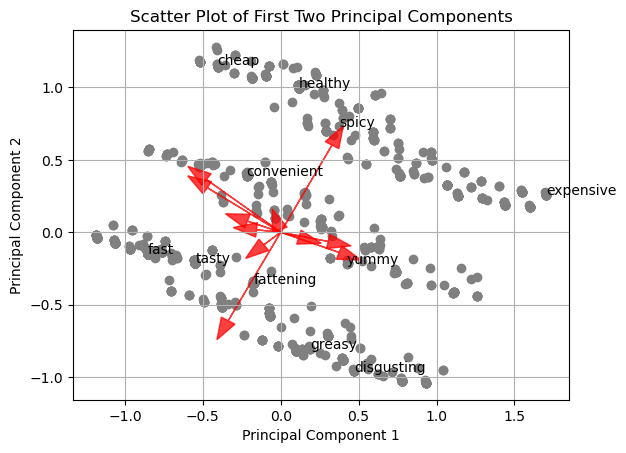

In [98]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a scatter plot using the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Annotate points with column names
for i, column_name in enumerate(MD_x.columns):
    plt.annotate(column_name, (MD_pca[i, 0], MD_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')

# Get principal components from the PCA object
proj_axes = pca.components_

for i in range(len(proj_axes[0])):
    plt.arrow(0, 0, proj_axes[0, i], proj_axes[1, i], color='red', alpha=0.75, linewidth=1, head_width=0.1)

plt.grid(True)
plt.show()



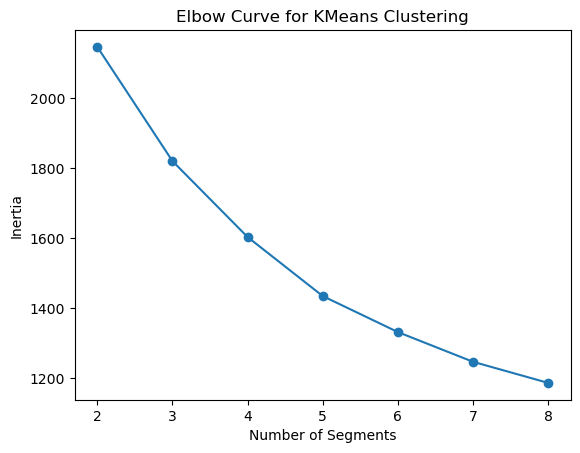

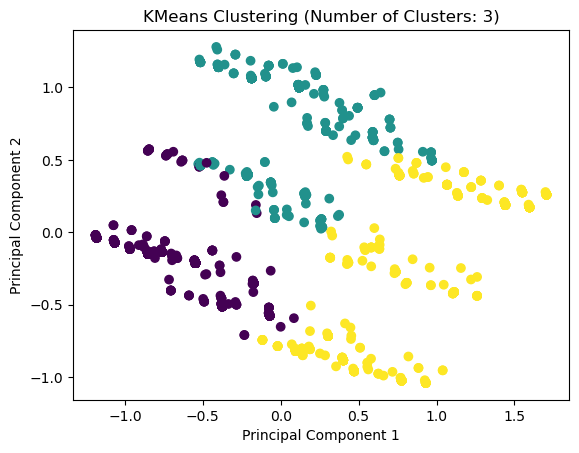

In [99]:
np.random.seed(1234)

#a function to perform KMeans clustering and return the inertia
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data)
    return kmeans.inertia_

# Create a list to store inertia values for different cluster numbers
inertia_values = []

for n_clusters in range(2, 9):
    inertia_values.append(perform_kmeans(MD_x, n_clusters))

plt.plot(range(2, 9), inertia_values, marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.show()

chosen_clusters = 3

# Perform KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_clusters, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

pca = PCA(n_components=2)
md_pca_transformed = pca.fit_transform(MD_x)

plt.scatter(md_pca_transformed[:, 0], md_pca_transformed[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'KMeans Clustering (Number of Clusters: {chosen_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

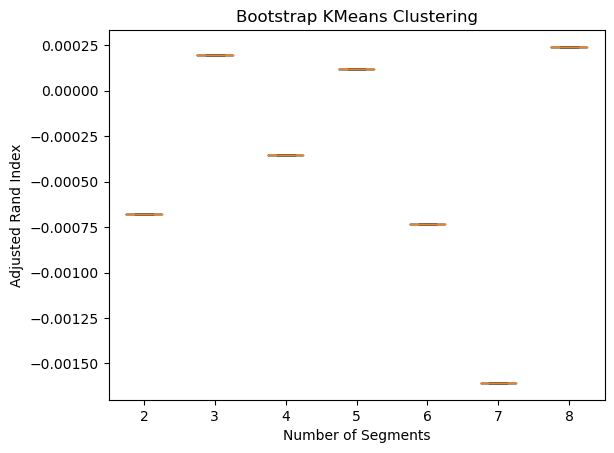

In [100]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

# a function to perform bootstrapped KMeans clustering and return the adjusted Rand index
def perform_bootstrapped_kmeans(data, n_clusters, nrep):
    stability_scores = []
    for _ in range(nrep):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = resample(data.values, random_state=1234)

        # Perform KMeans clustering on the bootstrap sample
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        cluster_labels = kmeans.fit_predict(bootstrap_sample)

        # Calculate the adjusted Rand index
        true_labels = kmeans.predict(data.values)
        rand_index = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(rand_index)

    return stability_scores

stability_scores_list = []

for n_clusters in range(2, 9):
    stability_scores = perform_bootstrapped_kmeans(MD_x, n_clusters, nrep=10)
    stability_scores_list.append(stability_scores)

# Transpose the stability_scores_list
stability_scores_array = np.array(stability_scores_list).T

plt.boxplot(stability_scores_array, labels=range(2, 9), whis=10)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap KMeans Clustering")
plt.show()


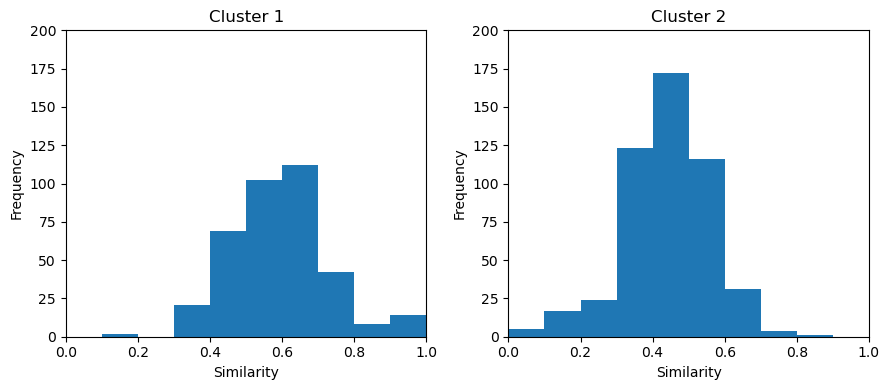

In [101]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Only plot the histograms for clusters 1 and 2
for i in range(1, 3):
    cluster_i_data = MD_x[cluster_labels == i]

    # Calculate similarities
    similarities = cluster_i_data.mean(axis=1)
    col = i - 1
    axs[col].hist(similarities, bins=num_bins, range=range_values)
    axs[col].set_xlabel('Similarity')
    axs[col].set_ylabel('Frequency')
    axs[col].set_title(f'Cluster {i}')

    axs[col].set_xlim(range_values)
    axs[col].set_ylim(0, max_frequency)

    axs[col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


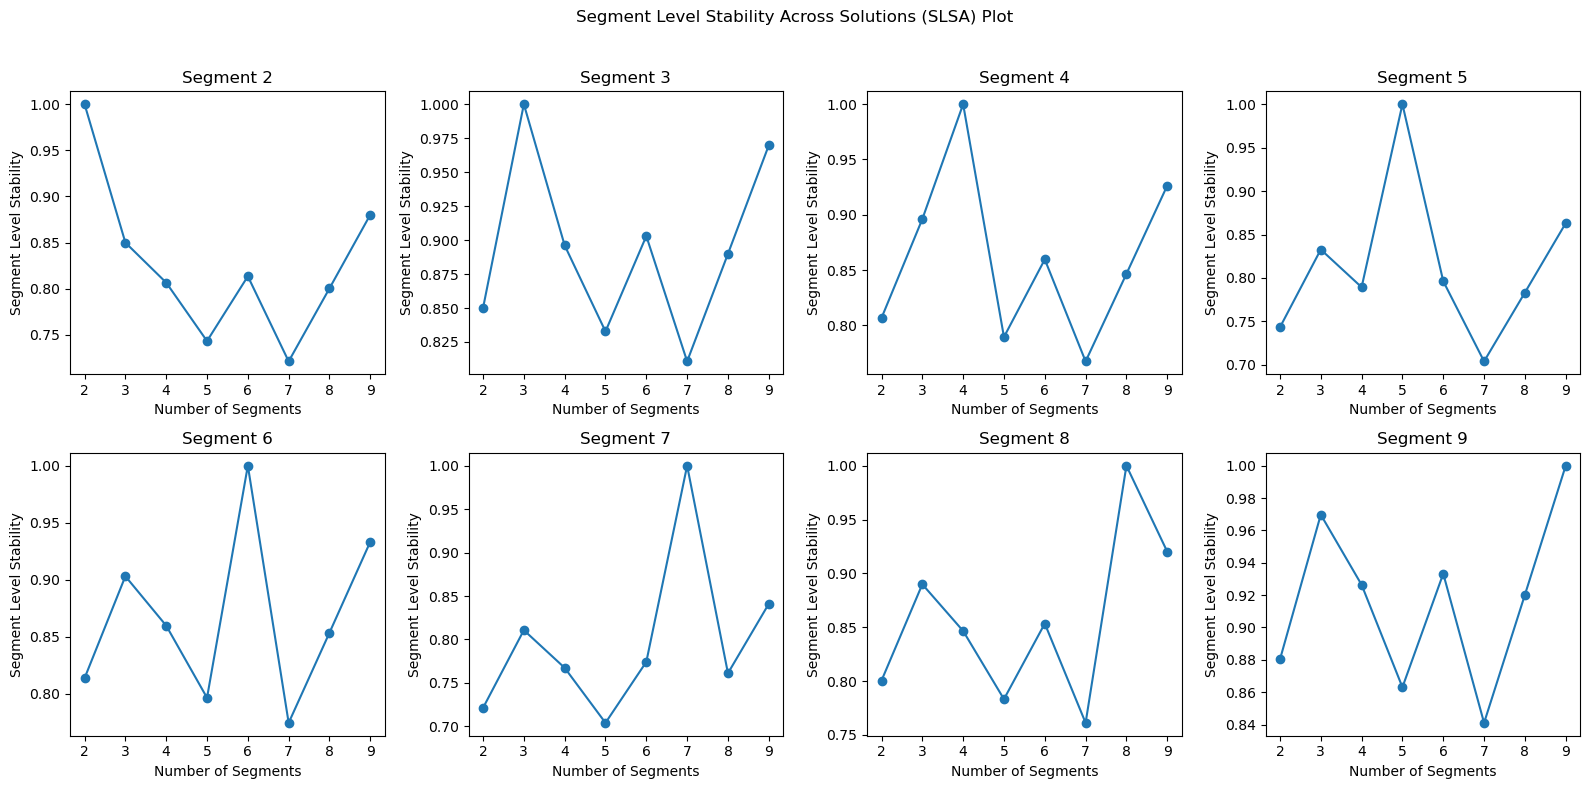

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, n_init=10, random_state=1234)
MD_km28 = kmeans.fit_predict(MD_x)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Segment Level Stability Across Solutions (SLSA) Plot')

num_segments = range(2, 10)

segment_stability = []
for segment in range(2, 10):
    labels_segment = MD_km28 == segment
    segment_stability.append(labels_segment)

for i, segment in enumerate(range(2, 10)):
    stability_values = [np.mean(segment_stability[segment - 2] == labels) for labels in segment_stability]
    
    # Check if the segment is empty
    if all(value == 0 for value in stability_values):
        axs[i // 4, i % 4].text(0.5, 0.5, 'Empty Segment', ha='center', va='center', fontsize=10, color='gray')
        axs[i // 4, i % 4].axis('off')
    else:
        axs[i // 4, i % 4].plot(num_segments, stability_values, marker='o', label=f'Segment {segment}')
        axs[i // 4, i % 4].set_xlabel('Number of Segments')
        axs[i // 4, i % 4].set_ylabel('Segment Level Stability')
        axs[i // 4, i % 4].set_title(f'Segment {segment}')
        axs[i // 4, i % 4].set_xticks(num_segments)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


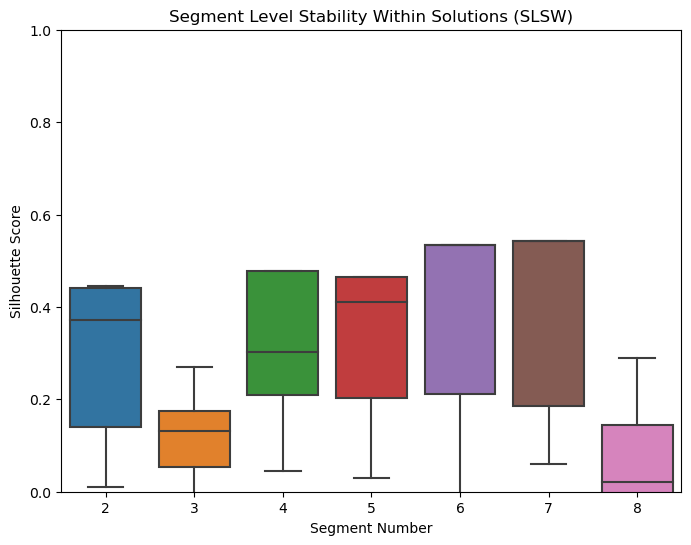

In [103]:
import seaborn as sns

# Calculate silhouette scores for each data point
silhouette_scores = silhouette_samples(MD_x, MD_km28, metric='euclidean')
data = {'Segment': MD_km28, 'Silhouette Score': silhouette_scores}
df_silhouette = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Silhouette Score', data=df_silhouette, order=range(2, 9))  # Set the x-axis order
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.xlabel('Segment Number')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.show()


In [104]:
# Reverse the frequency table
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(like_counts)

I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [105]:
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Display the frequency table for the new column
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index(ascending=True)
print(like_n_counts)

2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like_n, dtype: int64


In [106]:
import statsmodels.formula.api as smf

# Manually create a formula
formula_manual = 'Like_n ~ Var1 + Var2 + Var3 + Var4 + Var5 + Var6 + Var7 + Var8 + Var9 + Var10 + Var11'

# Automate the process
formula_automated = 'Like_n ~ ' + ' + '.join(mcdonalds.columns[1:12])
formula_automated = smf.ols(formula_automated, data=mcdonalds).fit()
print(formula_automated.model.formula)

Like_n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like


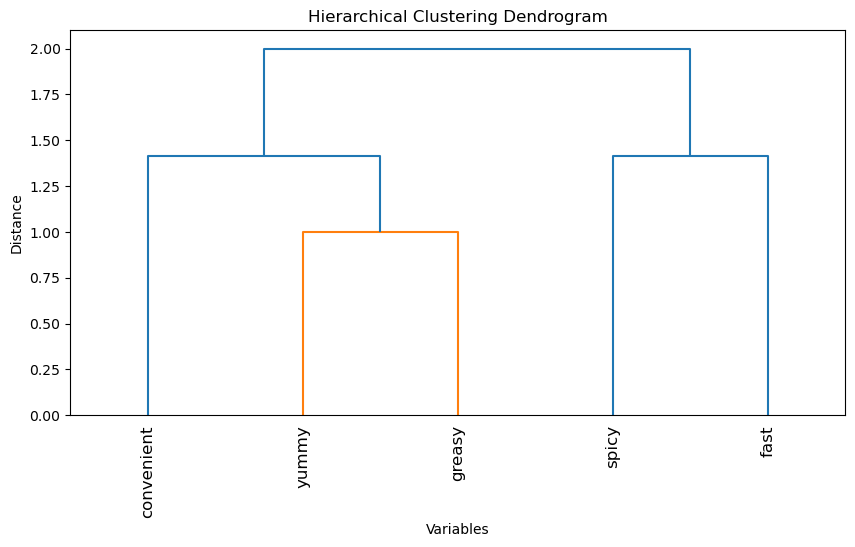

In [107]:
binary_matrix_data = np.array([[1, 0, 1, 0, 1],
                               [0, 1, 1, 0, 0],
                               [1, 1, 0, 1, 1],
                               [0, 0, 1, 0, 1]])

variable_names = ['yummy', 'convenient', 'spicy', 'greasy', 'fast']
MD_x = pd.DataFrame(binary_matrix_data, columns=variable_names)

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

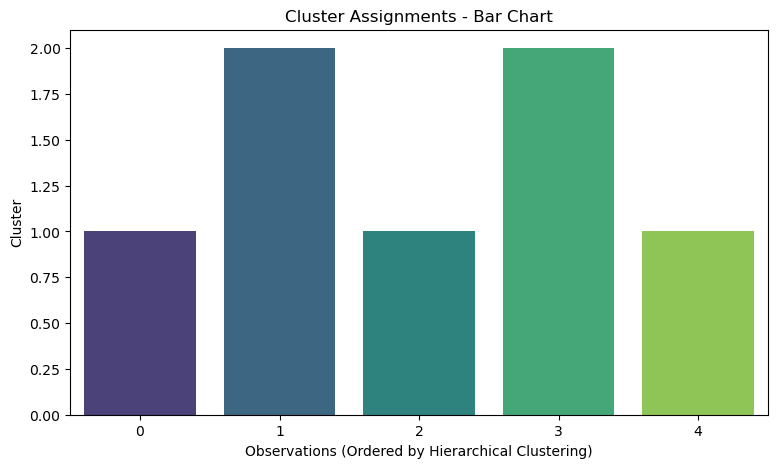

In [108]:
MD_k4 = np.array([1, 2, 1, 2, 1])
MD_vclust_order = np.arange(len(MD_k4))

cluster_data = pd.DataFrame({'Cluster': MD_k4, 'Order': MD_vclust_order})

# Sort the DataFrame based on hierarchical clustering order
cluster_data_sorted = cluster_data.sort_values(by='Order', ascending=False)
plt.figure(figsize=(9, 5))
sns.barplot(x='Order', y='Cluster', data=cluster_data_sorted, palette='viridis', ci=None)
plt.title('Cluster Assignments - Bar Chart')
plt.xlabel('Observations (Ordered by Hierarchical Clustering)')
plt.ylabel('Cluster')
plt.show()

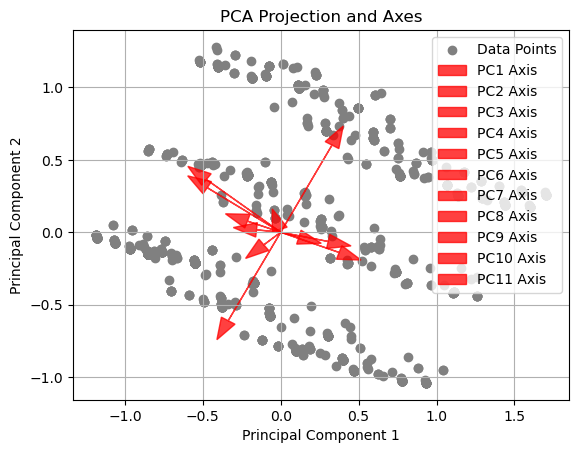

In [109]:
plt.scatter(md_pca_transformed[:, 0], md_pca_transformed[:, 1], color='grey', label='Data Points')

# Plot the projection axes
for i in range(len(proj_axes)):
    plt.arrow(0, 0, proj_axes[0, i], proj_axes[1, i], color='red', alpha=0.75, linewidth=1, head_width=0.1, label=f'PC{i + 1} Axis')

plt.title("PCA Projection and Axes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

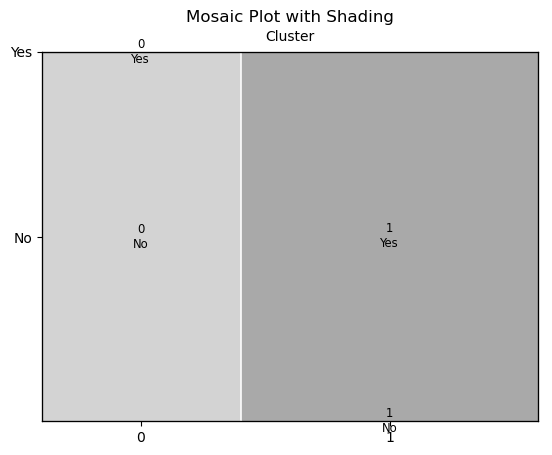

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

k4 = np.array([1, 0, 1, 0, 1])
mcdonalds = pd.DataFrame({'Like': ['Yes', 'No', 'Yes', 'No', 'Yes']})

cluster_data_like = pd.DataFrame({'Cluster': k4, 'Like': mcdonalds['Like']})
mosaic_data = pd.crosstab(cluster_data_like['Cluster'], cluster_data_like['Like'])
plt.figure(figsize=(8, 6))
mosaic(mosaic_data.stack(), properties=lambda key: {'color': 'lightgrey' if key[1] == 'No' else 'darkgrey'})
plt.title('Mosaic Plot with Shading')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


<Figure size 800x600 with 0 Axes>

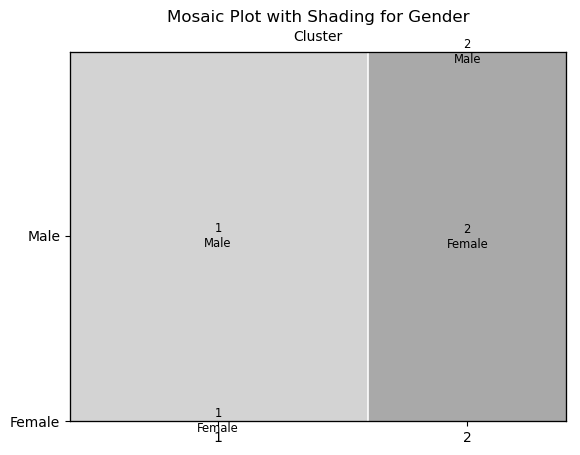

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

k4 = np.array([1, 0, 1, 0, 1])
mcdonalds = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']})

cluster_data_gender = pd.DataFrame({'Cluster': k4, 'Gender': mcdonalds['Gender']})

mosaic_data = pd.crosstab(cluster_data_gender['Cluster'], cluster_data_gender['Gender'])
plt.figure(figsize=(8, 6))
mosaic(mosaic_data.stack(), properties=lambda key: {'color': 'lightgrey' if key[1] == 'Male' else 'darkgrey'})
plt.title('Mosaic Plot with Shading for Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [116]:
k4 = np.array([-2, -1, 0, 1, 2])
mcdonalds = pd.DataFrame({
    'Like.n': [5, 3, 4, 2, 5],
    'Age': [25, 30, 22, 35, 28],
    'VisitFrequency': [3, 5, 2, 4, 3],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']
})

visit_means = mcdonalds.groupby(k4)['VisitFrequency'].mean()

print(visit_means)

like_means = mcdonalds.groupby(k4)['Like.n'].mean()

print(like_means)
# Convert 'Gender' to binary (1 for Female, 0 for Male) and calculate mean for each cluster
female_means = mcdonalds['Gender'].eq('Female').astype(int).groupby(k4).mean()

print(female_means)


-2    3.0
-1    5.0
 0    2.0
 1    4.0
 2    3.0
Name: VisitFrequency, dtype: float64
-2    5.0
-1    3.0
 0    4.0
 1    2.0
 2    5.0
Name: Like.n, dtype: float64
-2    0.0
-1    1.0
 0    0.0
 1    1.0
 2    0.0
Name: Gender, dtype: float64


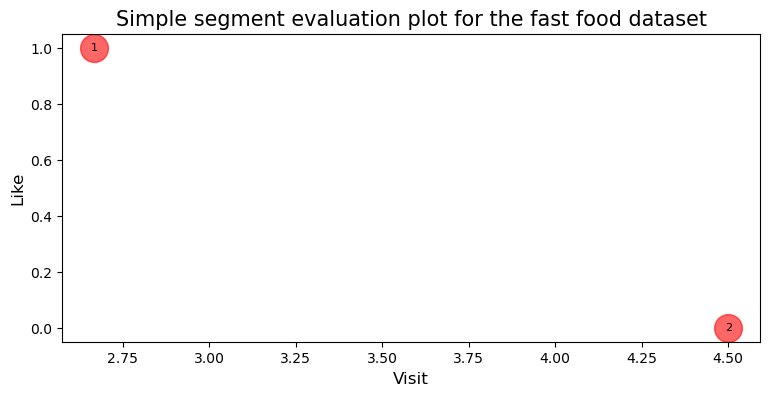

In [117]:
k4 = [-5, +5, -5, +5, -5]
mcdonalds = pd.DataFrame({'Like': ['Yes', 'No', 'Yes', 'No', 'Yes'],
                           'Gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
                           'VisitFrequency': [3, 4, 2, 5, 3]})

visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like'].apply(lambda x: (x == 'Yes').mean())
female_means = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())
visit_values = visit.values
like_values = like.values
female_values = female_means.values
plt.figure(figsize=(9, 4))
plt.scatter(visit_values, like_values, s=400, c='red', alpha=0.6)  # 's' is marker size
plt.title("Simple segment evaluation plot for the fast food dataset", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)

for i, txt in enumerate(range(1, len(visit_values) + 1)):
    plt.text(visit_values[i], like_values[i], str(txt), fontsize=8, ha='center', va='center')

plt.show()
